In [104]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [105]:
#Open dataframe
df_2017 = pd.read_excel('CP113B_Data_Redlining_Analysis_2017.xlsx')
df_2017 = df_2017.rename(columns = {'High School Drop Out Rate':'Percent High School Dropouts'})
df_2017 = df_2017.rename(columns = {'Percent Other Race/Ethnicity':'Percent Other Race or Ethnicity'})
df_2017.head(2)

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race or Ethnicity,Poverty Rate,Percent BA or Higher,Percent High School Dropouts,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value
0,6001400100,"Census Tract 4001, Alameda County, California",2991,69.207623,2.808425,3.778001,16.181879,8.024072,4.225352,81.301824,0.0,208393,1254,88.038278,1104500.0
1,6001400200,"Census Tract 4002, Alameda County, California",1997,71.306960,0.901352,8.863295,9.814722,9.113671,5.469142,81.696429,0.0,147500,828,59.782609,1045200.0


In [106]:
df_2000 = pd.read_excel('CP113B_Data_Redlining_Analysis_2000.xlsx')
df_2000.head(2)

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race or Ethnicity,Poverty Rate,Percent with a BA Degree or Higher,Percent High School Dropouts,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value
0,6001400100,Census Tract 4001,2463,76.461039,4.951299,4.586039,11.201299,2.800325,2.925640,83.717509,0.0,196645,1145,90.567686,985548
1,6001400200,Census Tract 4002,1943,79.989712,2.572016,5.967078,7.047325,4.423868,6.841564,77.258567,0.0,122061,862,57.656613,677115


In [107]:
#Another approach where we can select the variables we want to plot against each others.
Variance_1 = widgets.Dropdown(
    options=df_2017.columns.tolist(),
    description='Variable:',
    disabled=False,
)
display(Variance_1)

Variance_2=widgets.Dropdown(
    options=df_2017.columns.tolist(),
    description='Variable:',
    disabled=False,
)
display(Variance_2)

Dropdown(description='Variable:', options=('FIPS', 'Name of Area', 'Total Population', 'Percent Non-Hispanic W…

Dropdown(description='Variable:', options=('FIPS', 'Name of Area', 'Total Population', 'Percent Non-Hispanic W…

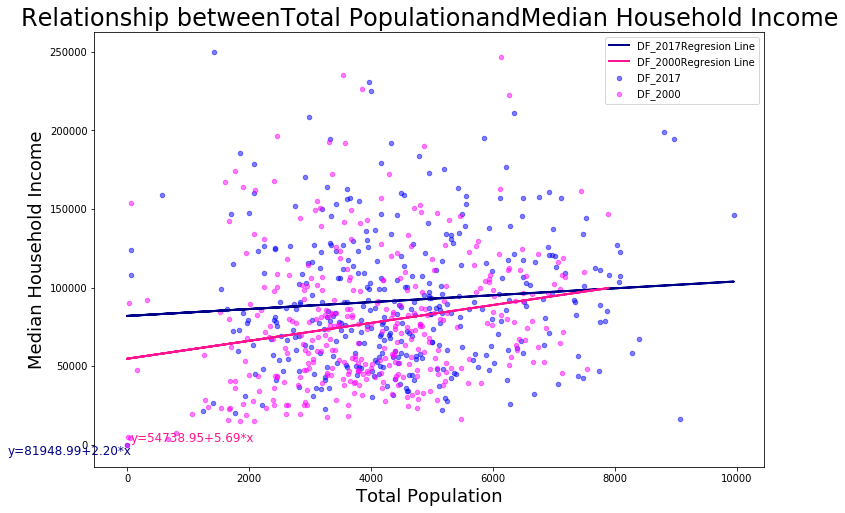

In [113]:
X = Variance_1.value
Y = Variance_2.value

# Polynomial males.
df_2017_fit = np.polyfit(df_2017[X],df_2017[Y],1)

# Polynomial females.
df_2000_fit = np.polyfit(df_2000[X],df_2000[Y],1)


# Scatter plots.
ax1= df_2017.plot(kind='scatter', x=X,y=Y, color='blue',alpha=0.5, figsize=(12,8))
df_2000.plot(kind='scatter', x=X,y=Y, color='magenta',alpha=0.5, figsize=(12,8),ax=ax1)

# Regression lines.
plt.plot(df_2017[X],df_2017_fit[0]*df_2017[X]+df_2017_fit[1], color='darkblue', linewidth=2)
plt.plot(df_2000[X],df_2000_fit[0]*df_2000[X]+df_2000_fit[1], color='deeppink', linewidth=2)

# Regression equations.
plt.text(65,23,'y={:.2f}+{:.2f}*x'.format(df_2017_fit[1],df_2017_fit[0]),color='darkblue',size=12, horizontalalignment='right',
     verticalalignment='top')
plt.text(65,23,'y={:.2f}+{:.2f}*x'.format(df_2000_fit[1],df_2000_fit[0]),color='deeppink',size=12,horizontalalignment='left',
     verticalalignment='bottom')

# Legend, title and labels.
plt.legend(labels=['DF_2017'+'Regresion Line','DF_2000'+'Regresion Line', 'DF_2017','DF_2000'])
plt.title('Relationship between'+ X + 'and' + Y, size=24)
plt.xlabel(X, size=18)
plt.ylabel(Y, size=18);